In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = True
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "easy",
                      "num_tasks" : 3,
                      "train_percentage" : 0.2,
                      "num_val_benchmarks" : 3,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 1000,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "cheated_HPO",
                "n_trials" : 3,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (2, 6),
                #"ewc_lambda" : (1,1000)
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : True,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True,
                          "visualize_violin" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation

In [5]:
device = get_device(1)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-11 11:21:40,928] A new study created in memory with name: Search
100%|██████████| 4/4 [00:06<00:00,  1.68s/it]
[I 2024-07-11 11:22:19,798] Trial 0 finished with value: 94.78478222222219 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 94.78478222222219.
100%|██████████| 6/6 [00:10<00:00,  1.68s/it]
[I 2024-07-11 11:23:08,701] Trial 1 finished with value: 94.81260444444443 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 94.81260444444443.
100%|██████████| 5/5 [00:08<00:00,  1.68s/it]
[I 2024-07-11 11:23:52,888] Trial 2 finished with value: 95.17774222222221 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 2 with value: 95.17774222222221.
  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 20%|██        | 1/5 [00:01<00:06,  1.59s/it]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 40%|████      | 2/5 [00:03<00:04,  1.58s/it]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 60%|██████    | 3/5 [00:04<00:03,  1.59s/it]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 80%|████████  | 4/5 [00:06<00:01,  1.58s/it]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 20%|██        | 1/5 [00:01<00:06,  1.63s/it]

In and out sizes :
fc1 : in = 784, out = 1442
fc2 : in = 1442, out = 1000
fc3 : in = 1000, out = 10


 40%|████      | 2/5 [00:03<00:04,  1.66s/it]

In and out sizes :
fc1 : in = 784, out = 1442
fc2 : in = 1442, out = 1000
fc3 : in = 1000, out = 10


 60%|██████    | 3/5 [00:04<00:03,  1.67s/it]

In and out sizes :
fc1 : in = 784, out = 1442
fc2 : in = 1442, out = 1000
fc3 : in = 1000, out = 10


 80%|████████  | 4/5 [00:06<00:01,  1.66s/it]

In and out sizes :
fc1 : in = 784, out = 1442
fc2 : in = 1442, out = 1003
fc3 : in = 1003, out = 10


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1442
fc2 : in = 1442, out = 1003
fc3 : in = 1003, out = 10


 20%|██        | 1/5 [00:01<00:06,  1.67s/it]

In and out sizes :
fc1 : in = 784, out = 1442
fc2 : in = 1442, out = 1003
fc3 : in = 1003, out = 10


 40%|████      | 2/5 [00:03<00:05,  1.67s/it]

In and out sizes :
fc1 : in = 784, out = 1442
fc2 : in = 1442, out = 1003
fc3 : in = 1003, out = 10


 60%|██████    | 3/5 [00:05<00:03,  1.70s/it]

In and out sizes :
fc1 : in = 784, out = 1964
fc2 : in = 1964, out = 1003
fc3 : in = 1003, out = 10


 80%|████████  | 4/5 [00:06<00:01,  1.70s/it]

In and out sizes :
fc1 : in = 784, out = 1964
fc2 : in = 1964, out = 1003
fc3 : in = 1003, out = 10


100%|██████████| 5/5 [00:08<00:00,  1.69s/it]


## Visualize results

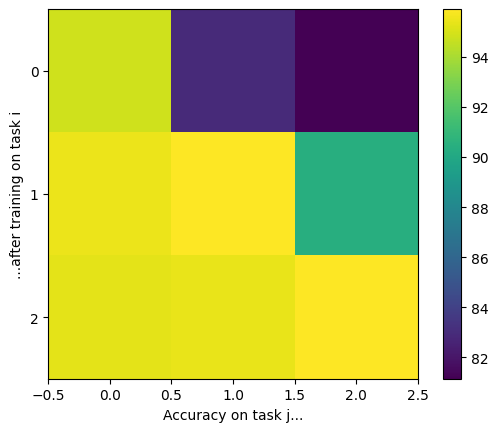

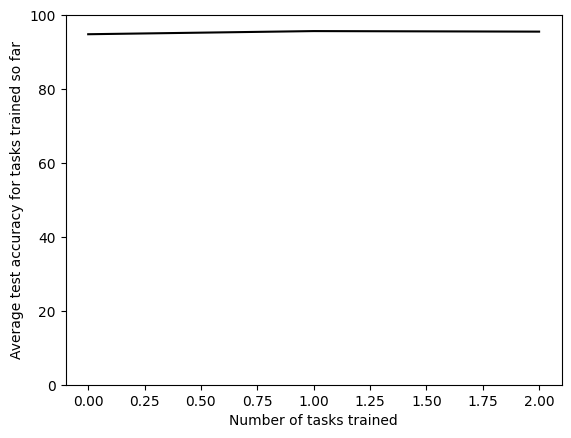

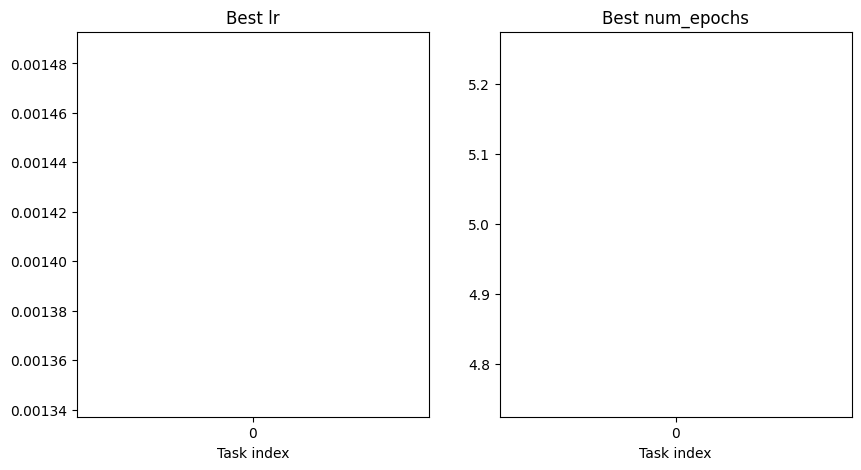

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/5 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 20%|██        | 1/5 [00:01<00:06,  1.67s/it]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 40%|████      | 2/5 [00:03<00:04,  1.66s/it]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 60%|██████    | 3/5 [00:04<00:03,  1.66s/it]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


 80%|████████  | 4/5 [00:06<00:01,  1.64s/it]

In and out sizes :
fc1 : in = 784, out = 1000
fc2 : in = 1000, out = 1000
fc3 : in = 1000, out = 10


100%|██████████| 5/5 [00:08<00:00,  1.65s/it]


--------------------------------------------------
LEARNING TASK 2


IndexError: list index out of range

## Visualize validation

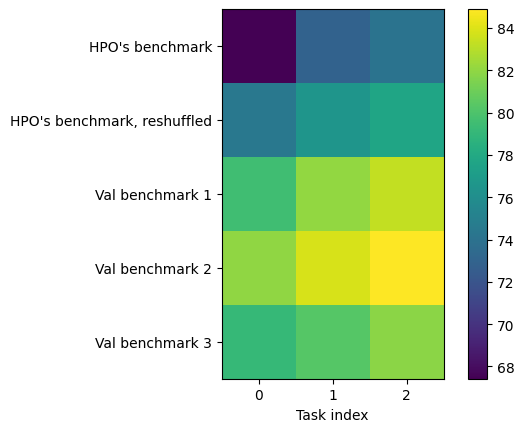

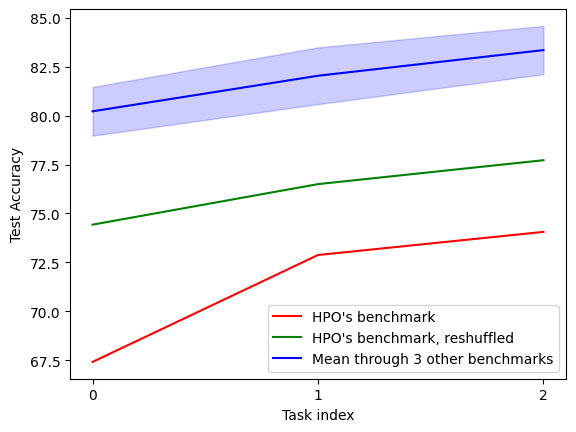

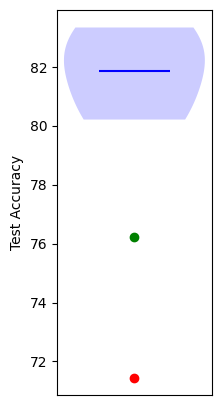

In [ ]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [ ]:
if save_results :
    np.savetxt('Results/test_accs_matrix.csv', test_accs_matrix)
    np.savetxt('Results/val_accs_matrix.csv', val_accs_matrix)